# Polynomial regression
In this notebook:
- We discuss Lagrange's interpolation theorem on finding polynomials that interpolate a set of points in the plane.
- We discuss polynomial regression, which is a method of fitting a polynomial to a set of points in the plane.

### Introduction
Suppose we have a regression problem with one variable $X$ and one target $Y$, both continuous variables. Assume that there are $m$ instances $(x_i,y_i)$, $i=1,\ldots,m$, of the variables. 
Recall that in our parametric ML framework, we assume the following: There exists a class of functions $\{f_{\mathbf{w}}\}$ (called a *model*), parameterized by a vector of parameters $\mathbf{w} \in \mathbb{R}^n$, such that for some particular choice of $(\mathbf{w})$, the relationship between $X$ and $Y$ can be modeled as
\begin{equation*}
    Y = f_{\mathbf{w}}(X) + \epsilon,
\end{equation*}
where $\epsilon$ is a random variable representing noise in the data.

For example, in the case of simple linear regression, the parameters are a pair $\mathbf{w} = (w_0,w_1) \in \mathbb{R}^2$, and the model is $f_{\mathbf{w}}(x) = w_0 + w_1x$. The particular choice of $\mathbf{w}$ giving the best model (according to some choice of loss function) is the "line of best fit". 

It is possible to also use higher order polynomials to model the relationship between $X$ and $Y$. For example, we could use a quadratic model $f_{\mathbf{w}}(x) = w_0 + w_1x + w_2x^2$, or a cubic model $f_{\mathbf{w}}(x) = w_0 + w_1x + w_2x^2 + w_3x^3$, and so on. Such a model is then called a **polynomial regression** model. Before we discuss this in detail, we first discuss the concept of interpolation and compare it to regression.

### Interpolation
As above, let's suppose we have a collection of data points $(x_i,y_i) \in \mathbb{R}^2$, $i=1,\ldots,m$. The goal of *interpolation* is to find a function $f(x)$ that passes through all the points *exactly* (without any error or noise term). In other words, we want to find a function $f(x)$ such that $f(x_i) = y_i$ for all $i=1,\ldots,m$. Of course, this is doomed to fail if the same $x$-value occurs more than once with different associated $y$-values. For simplicity, let's suppose for now that all $x_i$ are distinct.

There are many ways to interpolate a set of points, corresponding to the choice of the class of functions used. For this to make sense (i.e. be guaranteed to work), we need a class of functions that is "rich enough" to interpolate any set of points. Here are three commonly used classes with this "universal interpolator" property:
- Polynomials
- Piece-wise linear functions
- Splines (piece-wise polynomials)

### Polynomial interpolation
Of the three classes, the most natural (perhaps, because they are smooth?) are polynomials. We recall here that for a polynomial $f(x) = \sum_{i=0}^n a_ix^i$, with $a_n \neq 0$, the **degree** (or **order**) of $f(x)$ is the largest non-zero power of $x$ which appears, namely, $n$. Thus degree $0$ means a constant function, degree $1$ means a linear function, degree $2$ means a quadratic function, and so on.

Now, suppose we have a degree $n$ polynomial
\begin{equation*}
    f_{\mathbf{w}}(x) = w_0 + w_1x + w_2x^2 + \dotsb + w_nx^n.
\end{equation*}
Given a data point $(x_i,y_i)$, asking for this polynomial to pass through this data point means we must have
\begin{equation*}
    y_i = f_{\mathbf{w}}(x_i) = w_0 + w_1x_i + w_2x_i^2 + \dotsb + w_nx_i^n.
\end{equation*}
Now, recall that the main principle/take-away from linear algebra is that whenever you see a sum of products, you should immediately try to express it as a dot product. In this case, we can re-write the above equation as
\begin{equation*}
    y_i = \begin{bmatrix} \; 1 & x_i & \dotsb & x_i^n \; \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{bmatrix} = \mathbf{r}_i^T\mathbf{w}.
\end{equation*}
Thus, the polynomial interpolation problem can be re-stated as follows: Given a set of data points $(x_i,y_i)$, $i=1,\ldots,m$, find a vector $\mathbf{w} \in \mathbb{R}^{n+1}$ such that
\begin{equation*}
    \begin{bmatrix}
        1 & x_1 & \dotsb & x_1^n \\
        \vdots & \vdots & \ddots & \vdots \\
        1 & x_m & \dotsb & x_m^n
    \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{bmatrix} =  \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix}.
\end{equation*}
Thus, solving this equation amounts to solving a system of $m$ linear equations in $n+1$ unknowns. This leads to 3 cases:
1. If $m < n+1$, then the system is said to be *under-determined*, and there are infinitely many solutions. (In fact this is not super obvious, and it requires us to know that the rows of the matrix are linearly independent.)
2. If $m > n+1$, then the system is said to be *over-determined*, and there are no solutions (in general). In this case, we can try to find the "closest approximation" to a solution, which is the idea behind regression!
3. If $m=n+1$, then there always exists (provided all $x_i$'s are distinct) a *unique* solution. Writing this out in terms of the polynomial, this is known as: 

**Lagrange's interpolation theorem**: 
*Given a set of $m$ points $(x_i,y_i)$, $i=1,\dotsc,m$, with all $x_i$'s distinct, there exists a **unique** polynomial of degree at most $m-1$ that passes through all the points.*

In your HW 2, you will walk through a guided proof of this beautiful theorem. 

Below, let's see how to implement polynomial interpolation in Python using `polyfit` method from `numpy`.

           9             8             7             6             5
2.722e-19 x - 1.243e-18 x - 1.386e-17 x + 5.281e-17 x + 2.209e-16 x
              4     3             2
 - 4.881e-16 x + 1 x + 1.221e-15 x - 1 x - 1


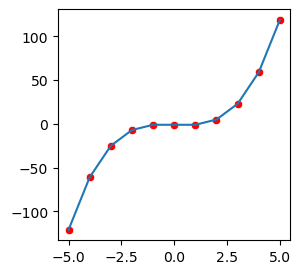

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a 1D array of numbers from 0 to 9
xs = np.arange(-5,6)

# 2. Create an array of ys by applying f(x) = x^2 - 4x - 10 to xs
ys = xs**3 - xs - 1

# 3. Compute an interpolant using polyfit
coeffs = np.polyfit(xs, ys, deg=9)

# 4. Make polynomial object
poly = np.poly1d(coeffs)

# 5. Print the polynomial
print(poly)

# 6. Plot the points and the polynomial
plt.figure(figsize=(3,3))
sns.scatterplot(x=xs, y=ys, color='red')
sns.lineplot(x=xs, y=poly(xs))
plt.show()


As we can see above, we did not get back the polynomial $x^3 - x -1$ that we originally used to generate the data. However, we came exceedingly close (because all the other coefficients are almost equal to zero). To rectify this issue, we can simply write a custom function to perform polynomial interpolation and round the coefficients to `round_to` decimal places.

In [6]:
def rounded_polyfit(x, y, deg, round_to=6):
    """
    Fit a polynomial to the data and round the coefficients to a specified number of decimal places (default = 6). Returns a polynomial object.
    """
    coeffs = np.polyfit(x, y, deg=deg)
    rounded_coeffs = np.round(coeffs, round_to)
    return np.poly1d(rounded_coeffs)

# Compute an interpolant using rounded_polyfit
rounded_poly = rounded_polyfit(xs, ys, deg=9)
print(rounded_poly)

   3
1 x - 1 x - 1


### Polynomial regression
In polynomial regression, we fit a polynomial to a set of points $(x_i,y_i)$, $i=1,\ldots,m$, by minimizing the sum of squared errors. In other words, we choose a degree $n$ and find the polynomial $f_{\mathbf{w}}(x)$ of degree $n$ that minimizes the MSE loss function. Thus, our model parameters are the coefficients of the polynomial:
\begin{equation*}
    \mathbf{w} = \begin{bmatrix} \; w_0 & w_1 & \dotsb & w_n \; \end{bmatrix}^T \in \mathbb{R}^{n+1}.
\end{equation*}
The loss function is therefore defined by
\begin{align*}
    J(\mathbf{w}; \mathbf{x},\mathbf{y}) & = \frac{1}{m} \sum_{i=1}^m \left( y_i - f_{\mathbf{w}}(x_i) \right)^2 \\
    & = \frac{1}{m} \sum_{i=1}^m \left( y_i - \sum_{j=0}^n w_jx_i^j \right)^2.
\end{align*}
Above, we've included the columns $\mathbf{x}$ and $\mathbf{y}$ of the labelled dataset to emphasize that the loss function depends on the given data.

Then, fitting the polynomial to the data amounts to finding the optimal parameters $\hat{\mathbf{w}} \in \mathbb{R}^{n+1}$ that minimize the loss function on the data:
\begin{equation*}
    \hat{\mathbf{w}} = \argmin_{\mathbf{w} \in \mathbb{R}^{n+1}} J(\mathbf{w};\mathbf{x},\mathbf{y}).
\end{equation*}


### Linearity of polynomial regression
It is important to note that polynomial regression is a linear regression problem (preceded by some data manipulation). This is because the model is linear in the parameters $\mathbf{w}$, even though it is non-linear in the input variable $x$. Thus, one can think of a degree $n$ polynomial regression model as consisting of two steps:
1. Use the single feature column $\mathbf{x}$ to create $n+1$ feature columns $\mathbf{1}, \mathbf{x}, \mathbf{x}^2, \dotsc, \mathbf{x}^n$, where
\begin{equation*}
    \mathbf{x}^j = \begin{bmatrix} \; x_1^j & \dotsb & x_m^j \; \end{bmatrix}^T \in \mathbb{R}^m.
\end{equation*}
These columns comprise an augmented design matrix $\mathbf{X} \in \mathbb{R}^{m \times (n+1)}$. 
2. Perform multiple linear regression on the labelled dataset $(\mathbf{X},\mathbf{y})$ to find the optimal parameters $\hat{\mathbf{w}}$ as usual. 

Let's demonstrate this below by writing a custom polynomial regression class which uses `LinearRegression` from `sklearn` to perform the regression after creating the augmented design matrix. Below, the function `np.vander` creates the *Vandermonde matrix* (of degree $n$) from the input vector $\mathbf{x}$, which is the matrix $X \in \mathbb{R}^{m \times (n+1)}$ above whose $j$-th column is consists of $j$-th powers of the feature vector $\mathbf{x}$. 

In [7]:
from sklearn.linear_model import LinearRegression

class MyPolynomialRegression:
    def __init__(self, deg=1, round_to=6):
        self.deg = deg
        self.poly = None
        self.round_to = round_to

    def fit(self, x, y):
        # create augmented x matrix with powers of x up to deg (includes constant term)
        X_train = np.vander(x, self.deg+1)
        # create linear regression object with no extra intercept
        model = LinearRegression(fit_intercept=False)
        # fit the model
        model.fit(X_train, y)
        # store the model as a np.poly1d object
        self.poly = np.poly1d(np.round(model.coef_, self.round_to))
    
    def predict(self, x):
        return self.poly(x)

To finish off this game, let's introduce a new (third) way to compute the polynomial regression: using the `PolynomialFeatures` class from `sklearn`. This class is used to generate polynomial and interaction features (i.e. it replaces the step where we create the Vandermonde matrix). Below, we demonstrate how to use this class to generate the augmented design matrix and perform polynomial regression. 

We also use the `make_pipeline` function from `sklearn` to create a pipeline that first generates the polynomial features and then performs linear regression. This is a very useful tool in practice, as it allows us to chain together multiple steps in the data processing and model fitting process.

In [8]:
# implement polynomial regression using PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

class MyPolynomialRegression2:
    def __init__(self, deg=1, round_to=6):
        self.deg = deg
        self.poly = None
        self.round_to = round_to

    def fit(self, x, y):
        # create linear regression object with no extra intercept
        model = make_pipeline(
            PolynomialFeatures(degree=self.deg),
            LinearRegression(fit_intercept=False)
        )
        # fit the model
        model.fit(x.reshape(-1,1), y)
        # get the coefficients from the linear regression step
        coeffs = model.named_steps['linearregression'].coef_
        # store the model as a np.poly1d object
        self.poly = np.poly1d(np.round(coeffs[::-1], self.round_to))
    
    def predict(self, x):
        return self.poly(x)

OK. So now we have three ways to perform polynomial regression:
1. Using `np.polyfit` to directly fit a polynomial to the data (without any data manipulation). If we want, we can also use the custom `rounded_polyfit` function to round the coefficients.
2. Using a custom class to perform polynomial regression by creating the augmented design matrix with `np.vander` and then performing linear regression using `sklearn`'s `LinearRegression`.
3. Using the `PolynomialFeatures` class from `sklearn` to generate the augmented design matrix and then performing linear regression using `sklearn`'s `LinearRegression`.

Let's check that all three methods yield the same result by generating some synthetic data and fitting a polynomial to it using all three methods.

In [9]:
# Generate 100 random x values in the range -5 to 5
np.random.seed(0)
x = np.random.uniform(-5, 5, 100)

# generate a degree 5 polynomial with random small coefficients
original_coeffs = np.random.uniform(-1, 1, 6).tolist()
original_poly = np.poly1d(original_coeffs)
print('Original polynomial to generate data: ')
print(original_poly)

# generate y values by evaluating the polynomial at the x values and adding random noise
y = original_poly(x) + np.random.normal(0, 5, 100)

# for degrees 1,..., 10, fit a polynomial to the data using the three methods, round to 8 decimal places. Store the polys as poly1d objects in a dataframe with index 1,...,10
import pandas as pd
df = pd.DataFrame(index=range(1,11), columns=['rounded_polyfit', 'MyPolynomialRegression', 'MyPolynomialRegression2', 'MSE'])

for deg in range(1, 11):
    # rounded_polyfit
    coeffs = rounded_polyfit(x, y, deg=deg,round_to=8)
    df.loc[deg, 'rounded_polyfit'] = np.poly1d(coeffs)

    # MyPolynomialRegression
    my_poly_reg = MyPolynomialRegression(deg=deg, round_to=8)
    my_poly_reg.fit(x, y)
    df.loc[deg, 'MyPolynomialRegression'] = my_poly_reg.poly

    # MyPolynomialRegression2
    my_poly_reg2 = MyPolynomialRegression2(deg=deg, round_to=8)
    my_poly_reg2.fit(x, y)
    df.loc[deg, 'MyPolynomialRegression2'] = my_poly_reg2.poly

    # compute the MSE for the MyPolynomialRegression model
    y_pred = my_poly_reg.predict(x)
    mse = np.mean((y - y_pred)**2)
    df.loc[deg, 'MSE'] = mse

# display the df
df

Original polynomial to generate data: 
        5        4          3          2
0.3556 x - 0.46 x + 0.4704 x + 0.9244 x - 0.5025 x + 0.1523


,rounded_polyfit,MyPolynomialRegression,MyPolynomialRegression2,MSE
1,[108.13671355],[108.13671355],[108.13671355],44063.004725
2,"[-7.48874259, 105.54568672]","[-7.48874259, 105.54568672]","[-7.48874259, 105.54568672]",40822.399022
3,"[10.40551973, -8.77141539, -54.76278089]","[10.40551973, -8.77141539, -54.76278089]","[10.40551973, -8.77141539, -54.76278089]",2651.636843
4,"[-0.59110603, 10.33246571, 3.95949684, -52.448...","[-0.59110603, 10.33246571, 3.95949684, -52.448...","[-0.59110603, 10.33246571, 3.95949684, -52.448...",1889.143946
5,"[0.36298464, -0.46396077, 0.27794198, 1.043402...","[0.36298464, -0.46396077, 0.27794198, 1.043402...","[0.36298464, -0.46396077, 0.27794198, 1.043402...",24.758411
6,"[-0.00407232, 0.36082603, -0.32501017, 0.33420...","[-0.00407232, 0.36082603, -0.32501017, 0.33420...","[-0.00407232, 0.36082603, -0.32501017, 0.33420...",23.469255
7,"[-0.00018491, -0.00414861, 0.36816268, -0.3228...","[-0.00018491, -0.00414861, 0.36816268, -0.3228...","[-0.00018491, -0.00414861, 0.36816268, -0.3228...",23.452858
8,"[-7.111e-05, -0.00019144, -0.0008791, 0.368324...","[-7.111e-05, -0.00019144, -0.0008791, 0.368324...","[-7.111e-05, -0.00019144, -0.0008791, 0.368324...",23.438096
9,"[2.67e-06, -7.002e-05, -0.00033033, -0.0009307...","[2.67e-06, -7.002e-05, -0.00033033, -0.0009307...","[2.67e-06, -7.002e-05, -0.00033033, -0.0009307...",23.43797
10,"[-7.3e-07, 2.24e-06, -2.751e-05, -0.0003089, -...","[-7.3e-07, 2.24e-06, -2.751e-05, -0.0003089, -...","[-7.3e-07, 2.24e-06, -2.751e-05, -0.0003089, -...",23.437955


Great! It seems that our custom polynomial regression class is working as expected; we got the exact same fitted polynomials (with coefficients rounded to $8$ decimal places) using all three methods. Let's plot the data and the fitted polynomial to see how well the polynomial fits the data.

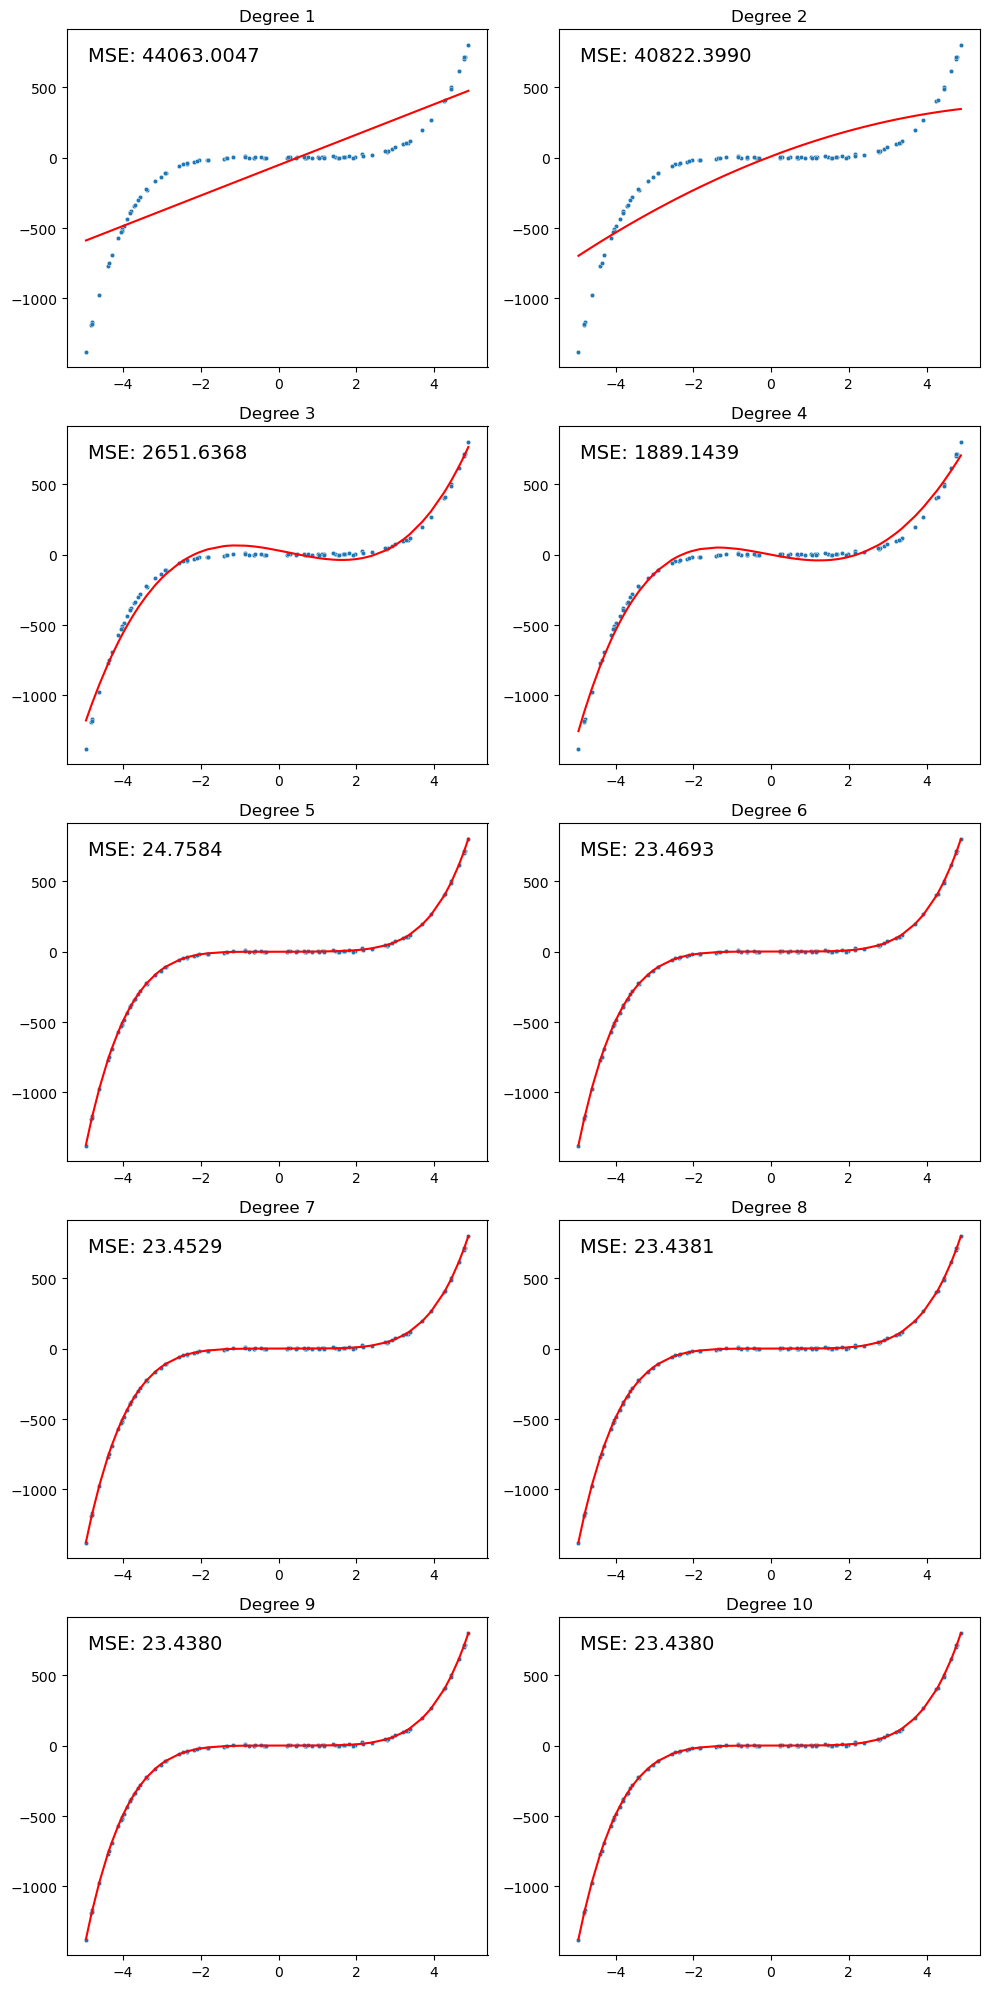

In [10]:
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
ax = ax.flatten()
for deg in range(1,11):
    i=deg-1
    f = df.loc[deg, 'rounded_polyfit']
    mse = df.loc[deg, 'MSE']
    sns.scatterplot(x=x, y=y, ax=ax[i], s=10)
    sns.lineplot(x=x, y=f(x), ax=ax[i], color='red')
    # display the mean squared error in a box on the plot
    ax[i].text(0.05, 0.95, f'MSE: {mse:.4f}', transform=ax[i].transAxes, fontsize=14, verticalalignment='top')
    ax[i].set_title(f'Degree {deg}')
plt.tight_layout()
plt.show()

Note the very sharp drop-off in MSE when the polynomial degree goes from $4$ to $5$ (which was the degree of the original polynomial used to generate the data). However, when we increase the degree further, the change in MSE is negligable in comparison. This is to be expected, since we created the original data using a degree $5$ polynomial, and so a degree $5$ polynomial should be able to fit the data very well. 

Determine the right degree polynomial to use in a regression problem is a bit of an art. We will discuss this later in the semester as part of a broader discussion on the bias-variance tradeoff in machine learning. 

### Polynomials in many variables
Before moving on to the next section, let's briefly discuss some terminology about multi-variable polynomials. Suppose we have variables $x_1,\dotsc,x_n$. A *monomial* in these variables is a function of the form
\begin{equation*}
    x_1^{a_1}x_2^{a_2} \dotsm x_n^{a_n}.
\end{equation*}
The *degree* of such a monomial is the sum of the exponents $a_1 + a_2 + \dotsb + a_n$. A *polynomial* in these variables is a linear combination of monomials, where (for us) the coefficients are real numbers. The *degree* of a polynomial is the maximum degree of any monomial appearing in the polynomial. For example, $x_1^2x_2 + x_1x_2^2 + x_1x_2$ is a degree $3$ polynomial in two variables, and $x_1x_2x_3 + x_4^5$ is a degree $5$ polynomial in four variables. 

### Polynomial regression with multiple features
In the above discussion, we considered the case of polynomial regression with a single feature $X$. However, polynomial regression can be generalized to the case of multiple features. For example, if we have three features $X_1,X_2$ and $X_3$, and we want to fit a polynomial of degree $2$ to the data, then the model would be given by
\begin{equation*}
    f_{\mathbf{w}}(X_1,X_2,X_3) = w_0 + w_1X_1 + w_2X_2 + w_3X_3 + w_4X_1^2 + w_5X_2^2 + w_6X_3^2 + w_7X_1X_2 + w_8X_1X_3 + w_9X_2X_3.
\end{equation*}
The augmented design matrix would consists of $10$ columns, one for each of the monomials:
\begin{equation*}
    \begin{bmatrix}
        1 & X_1 & X_2 & X_3 & X_1^2 & X_2^2 & X_3^2 & X_1X_2 & X_1X_3 & X_2X_3
    \end{bmatrix}.
\end{equation*}
After creating the augmented design matrix with the appropriate monomials, we can perform linear regression as usual to find the optimal parameters $\hat{\mathbf{w}}$.

Note that polynomials in multiple variables allow for more complex relationships between the features. Indeed, the terms $X_1X_2$, $X_1X_3$ and $X_2X_3$ allow for interactions between the features, which can capture more complex relationships than simple linear regression. 

We illustrate this below by generating some synthetic data with two features and fitting a polynomial of degree $2$ to the data. We also fit a multiple linear regression model to the data for comparison. Then, we plot the predictions for both fitted models to compare the MSE. Finally, we visualize the points in 3D space to see how well each model fits the data. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data for two features by sampling uniformly from 0 to 10
n_samples = 100
X1 = np.random.uniform(0, 10, n_samples)
X2 = np.random.uniform(0, 10, n_samples)

# Create an interaction between X1 and X2 in the target variable, plus some noise.
# True relationship: Y = 2 + 1.5*X1 + 3*X2 - 2.5*(X1*X2) + (X1)**2 - (X2)**2 + noise
noise = np.random.normal(0, 5, n_samples)
Y = 2 + 1.5*X1 + 3*X2 - 2.5*(X1*X2) + (X1)**2 - (X2)**2 + noise

# Stack X1 and X2 into a two-dimensional array
X = np.column_stack((X1, X2))

# Create a pipeline that generates polynomial features (including interaction terms) 
# up to degree 2 and then applies linear regression.
poly_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=True),
    LinearRegression(fit_intercept=False)  # we include bias in the polynomial features
)
# create a linear regression model
linear_model = LinearRegression()

# Fit the models to the data
poly_model.fit(X, Y)
linear_model.fit(X, Y)

# Predict values using the models for visualization
Y_poly = poly_model.predict(X)
Y_linear = linear_model.predict(X)

# compute the MSE for both models
mse_poly = np.mean((Y - Y_poly)**2)
mse_linear = np.mean((Y - Y_linear)**2)

# Print mse
print(f"MSE for quadratic polynomial model: {mse_poly:.3f}")
# Print the learned coefficients of poly_model
# The order of coefficients corresponds to [1, X1, X2, X1^2, X1X2, X2^2]
coeff_labels = ['Intercept', 'X1', 'X2', 'X1²', 'X1X2', 'X2²']
coefficients = poly_model.named_steps['linearregression'].coef_
print("Coefficients:")
for label, coef in zip(coeff_labels, np.round(coefficients, 3)):
    print(f"{label}: {coef}")

print()
# Print mse
print(f"MSE for linear model: {mse_linear:.3f}")
# Print the learned coefficients of linear_model
print("Coefficients:")
print(f"Intercept: {np.round(linear_model.intercept_, 3)}")
print(f"X1: {np.round(linear_model.coef_[0], 3)}")
print(f"X2: {np.round(linear_model.coef_[1], 3)}")

MSE for quadratic polynomial model: 23.030
Coefficients:
Intercept: 3.555
X1: 1.249
X2: 2.23
X1²: 1.009
X1X2: -2.499
X2²: -0.889

MSE for linear model: 551.725
Coefficients:
Intercept: 60.551
X1: -1.199
X2: -18.197


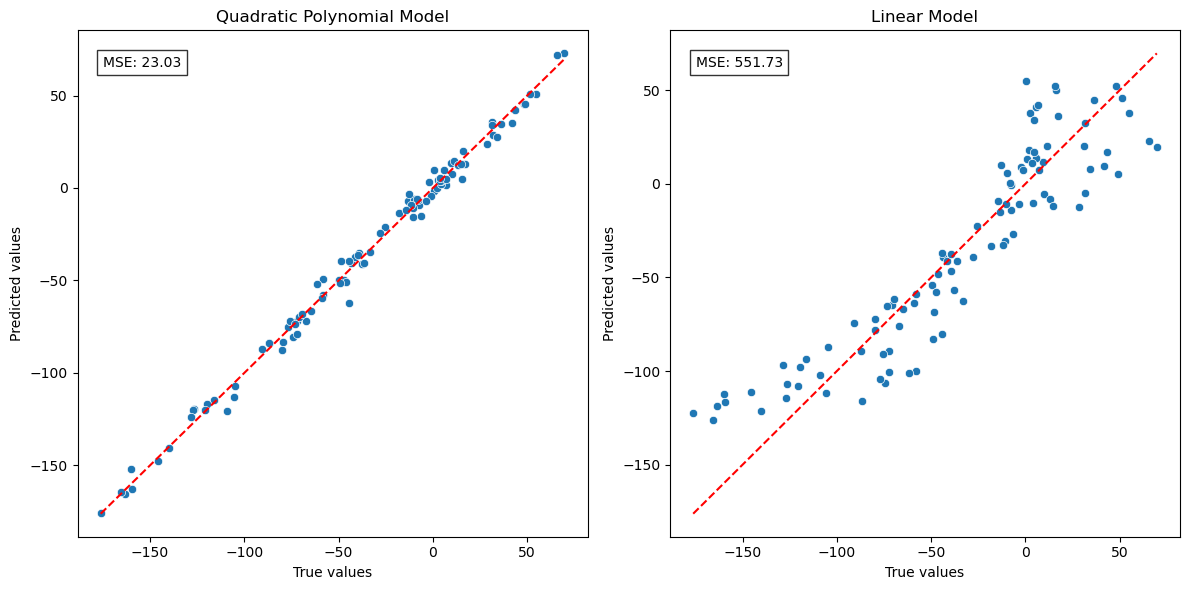

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the true vs predicted values for the polynomial model using seaborn scatterplot
ax[0].set_title("Quadratic Polynomial Model")
sns.scatterplot(x=Y, y=Y_poly, ax=ax[0])
ax[0].set(xlabel='True values', ylabel='Predicted values')
# draw a diagonal line to represent perfect predictions (red, dashed)
ax[0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
# Add MSE text box
ax[0].text(0.05, 0.95, f'MSE: {mse_poly:.2f}', 
           transform=ax[0].transAxes,
           bbox=dict(facecolor='white', alpha=0.8),
           verticalalignment='top')

# Plot the true vs predicted values for the linear model using seaborn scatterplot
ax[1].set_title("Linear Model")
sns.scatterplot(x=Y, y=Y_linear, ax=ax[1])
ax[1].set(xlabel='True values', ylabel='Predicted values')
# draw a diagonal line to represent perfect predictions (red, dashed)
ax[1].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
# Add MSE text box
ax[1].text(0.05, 0.95, f'MSE: {mse_linear:.2f}', 
           transform=ax[1].transAxes,
           bbox=dict(facecolor='white', alpha=0.8),
           verticalalignment='top')

plt.tight_layout()
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

def plot_3d_models(elevation, azimuth):
    fig = plt.figure(figsize=(12, 5))
    
    # Plot for polynomial model
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(X1, X2, Y, color='blue', alpha=0.6, label='True Y')
    
    # Create surface for polynomial model
    x1_range = np.linspace(X1.min(), X1.max(), 100)
    x2_range = np.linspace(X2.min(), X2.max(), 100)
    X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
    Y_pred_grid = poly_model.predict(np.column_stack((X1_grid.ravel(), X2_grid.ravel()))).reshape(X1_grid.shape)
    ax1.plot_surface(X1_grid, X2_grid, Y_pred_grid, alpha=0.5, color='red')
    
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('Y')
    ax1.set_title('Quadratic Polynomial Model\nMSE: {:.2f}'.format(mse_poly))
    ax1.view_init(elev=elevation, azim=azimuth)
    
    # Plot for linear model
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(X1, X2, Y, color='blue', alpha=0.6, label='True Y')
    
    # Create surface for linear model
    Y_linear_grid = linear_model.predict(np.column_stack((X1_grid.ravel(), X2_grid.ravel()))).reshape(X1_grid.shape)
    ax2.plot_surface(X1_grid, X2_grid, Y_linear_grid, alpha=0.5, color='green')
    
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('Y')
    ax2.set_title('Linear Model\nMSE: {:.2f}'.format(mse_linear))
    ax2.view_init(elev=elevation, azim=azimuth)
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
elevation_slider = widgets.FloatSlider(
    value=30,
    min=0,
    max=90,
    step=1,
    description='Elevation:',
    continuous_update=True
)

azimuth_slider = widgets.FloatSlider(
    value=45,
    min=0,
    max=360,
    step=1,
    description='Azimuth:',
    continuous_update=True
)

# Create interactive plot
widgets.interactive(plot_3d_models, elevation=elevation_slider, azimuth=azimuth_slider)


interactive(children=(FloatSlider(value=30.0, description='Elevation:', max=90.0, step=1.0), FloatSlider(value…